<a href="https://colab.research.google.com/github/Jane23415/Data_Science_Project/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"11pnfuhO9lDEoLNmZvjf-Sb0U6bhmzjwR"}) 
downloaded.GetContentFile("Film_Permits.csv")  

In [5]:
pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=d5648bb9dced9757f3be1da18a4a891f6e13ca204a860553bdfed6fa19d1f7d3
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [6]:
import folium
import pandas as pd 
import pandasql as psql
import matplotlib.pyplot as plt
from collections import Counter


In [8]:
# Reading csv file
film_file = pd.read_csv('Film_Permits.csv')

In [ ]:
# Filter rows where EventType = Shooting Permit
event_filter = 'SELECT * FROM film_file WHERE EventType = "Shooting Permit"'
event = psql.sqldf(event_filter)
event

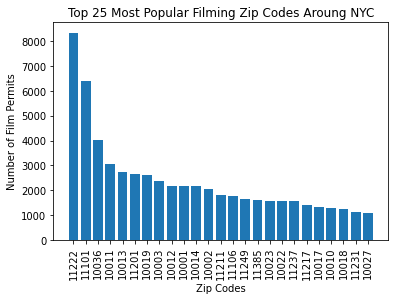

In [41]:
# Finding the most popular zip codes used for filming locations in NYC 
zipcode_list = []
for i in event['ZipCode(s)']:
    temp = str(i).split(", ")
    for j in temp:
        zipcode_list.append(j)

# Graph the 25 most popular zip codes in NYC 
zip_dict = Counter(zipcode_list).most_common(25)

zip_keys = [x[0] for x in zip_dict]
zip_values = [x[1] for x in zip_dict]

top_zip = plt.bar(zip_keys, zip_values)
plt.title('Top 25 Most Popular Filming Zip Codes Aroung NYC')
plt.xlabel('Zip Codes')
plt.xticks(rotation = 90)
plt.ylabel('Number of Film Permits')
plt.show()

In [36]:
print("Zip Code", "", "Total")
for i in zip_dict:
  print(i[0], " \t ", i[1])

Zip Code  Total
11222  	  8340
11101  	  6413
10036  	  4006
10011  	  3041
10013  	  2754
11201  	  2644
10019  	  2630
10003  	  2380
10012  	  2188
10001  	  2187
10014  	  2173
10002  	  2067
11211  	  1809
11106  	  1779
11249  	  1660
11385  	  1605
10023  	  1565
10022  	  1556
11237  	  1548
11217  	  1394
10017  	  1322
10010  	  1293
10018  	  1245
11231  	  1129
10027  	  1094


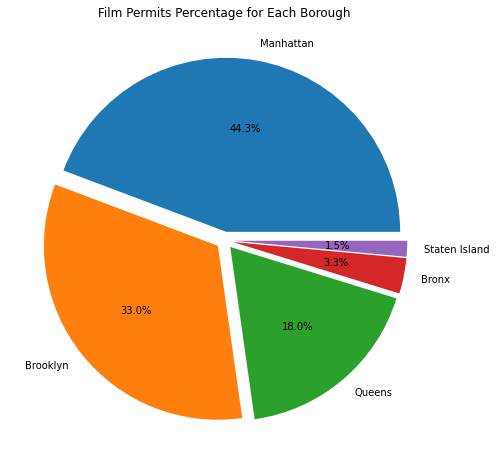

In [20]:
# Create pie chart to see which borough most filming locations are in
borough_count = event['Borough'].value_counts()
borough_count.plot.pie(explode = [0.05, 0.05, 0.05, 0.05, 0.05], autopct='%1.1f%%',figsize=(8,8))
plt.title('Film Permits Percentage for Each Borough')
plt.ylabel('')
plt.show()

In [39]:
# Print out the total number of filming permits in each borough
print("Borough", "\t", "Total")
print(borough_count)

Borough 	 Total
Manhattan        27727
Brooklyn         20654
Queens           11267
Bronx             2070
Staten Island      922
Name: Borough, dtype: int64


In [ ]:
# Filter rows where Borough = Manhattan
manhattan_filter = 'SELECT * FROM event WHERE Borough = "Manhattan"'
manhattan = psql.sqldf(manhattan_filter)
manhattan

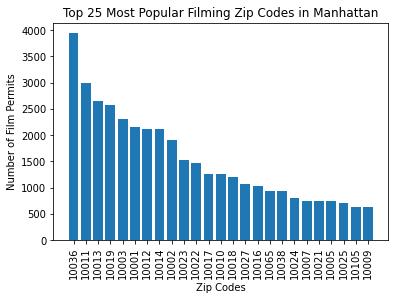

In [42]:
# Finding the most popular zip codes used for filming locations in Manhattan 
manhattan_list = []
for i in manhattan['ZipCode(s)']:
    temp = str(i).split(", ")
    for j in temp:
        manhattan_list.append(j)

# Graph the 25 most popular zip codes in Manhattan
manhattan_dict = Counter(manhattan_list).most_common(25)

manhattan_keys = [x[0] for x in manhattan_dict]
manhattan_values = [x[1] for x in manhattan_dict]

manhattan_zip = plt.bar(manhattan_keys, manhattan_values)
plt.title('Top 25 Most Popular Filming Zip Codes in Manhattan')
plt.xlabel('Zip Codes')
plt.xticks(rotation = 90)
plt.ylabel('Number of Film Permits')
plt.show()

In [46]:
print("Zip Code", "", "Total")
for i in manhattan_dict:
  print(i[0], " \t ", i[1])

Zip Code  Total
10036  	  3943
10011  	  2987
10013  	  2653
10019  	  2579
10003  	  2310
10001  	  2154
10012  	  2122
10014  	  2118
10002  	  1911
10023  	  1534
10022  	  1473
10017  	  1268
10010  	  1265
10018  	  1205
10027  	  1070
10016  	  1025
10065  	  934
10038  	  932
10024  	  804
10007  	  749
10021  	  747
10005  	  742
10025  	  706
10105  	  634
10009  	  633


In [ ]:
# Filter rows where Borough = Brooklyn
brooklyn_filter = 'SELECT * FROM event WHERE Borough = "Brooklyn"'
brooklyn = psql.sqldf(brooklyn_filter)
brooklyn

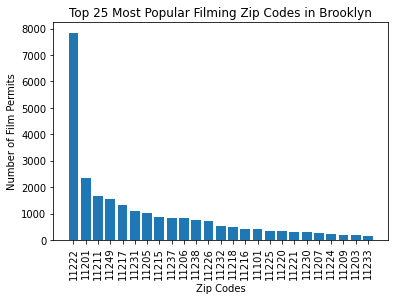

In [43]:
# Finding the most popular zip codes used for filming locations in Brooklyn 
brooklyn_list = []
for i in brooklyn['ZipCode(s)']:
    temp = str(i).split(", ")
    for j in temp:
        brooklyn_list.append(j)

# Graph the 25 most popular zip codes in Brooklyn
brooklyn_dict = Counter(brooklyn_list).most_common(25)

brooklyn_keys = [x[0] for x in brooklyn_dict]
brooklyn_values = [x[1] for x in brooklyn_dict]

brooklyn_zip = plt.bar(brooklyn_keys, brooklyn_values)
plt.title('Top 25 Most Popular Filming Zip Codes in Brooklyn')
plt.xlabel('Zip Codes')
plt.xticks(rotation = 90)
plt.ylabel('Number of Film Permits')
plt.show()

In [47]:
print("Zip Code", "", "Total")
for i in brooklyn_dict:
  print(i[0], " \t ", i[1])

Zip Code  Total
11222  	  7837
11201  	  2325
11211  	  1672
11249  	  1563
11217  	  1340
11231  	  1081
11205  	  1011
11215  	  883
11237  	  814
11206  	  812
11238  	  740
11226  	  727
11232  	  539
11218  	  495
11216  	  427
11101  	  413
11225  	  350
11220  	  321
11221  	  313
11230  	  288
11207  	  279
11224  	  231
11209  	  190
11203  	  172
11233  	  164


In [ ]:
# Filter rows where Borough = Queens
queens_filter = 'SELECT * FROM event WHERE Borough = "Queens"'
queens = psql.sqldf(queens_filter)
queens

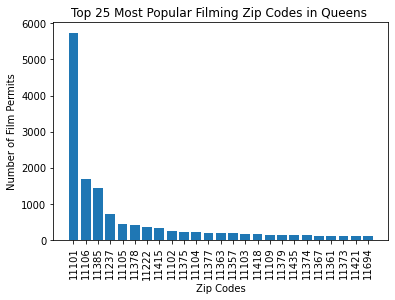

In [45]:
# Finding the most popular zip codes used for filming locations in Queens 
queens_list = []
for i in queens['ZipCode(s)']:
    temp = str(i).split(", ")
    for j in temp:
        queens_list.append(j)

# Graph the 25 most popular zip codes in Queens 
queens_dict = Counter(queens_list).most_common(25)

queens_keys = [x[0] for x in queens_dict]
queens_values = [x[1] for x in queens_dict]

queens_zip = plt.bar(queens_keys, queens_values)
plt.title('Top 25 Most Popular Filming Zip Codes in Queens ')
plt.xlabel('Zip Codes')
plt.xticks(rotation = 90)
plt.ylabel('Number of Film Permits')
plt.show()

In [48]:
print("Zip Code", "", "Total")
for i in queens_dict:
  print(i[0], " \t ", i[1])

Zip Code  Total
11101  	  5736
11106  	  1697
11385  	  1436
11237  	  705
11105  	  437
11378  	  408
11222  	  368
11415  	  319
11102  	  261
11375  	  222
11104  	  214
11377  	  204
11363  	  185
11357  	  181
11103  	  172
11418  	  152
11109  	  134
11379  	  134
11435  	  126
11374  	  124
11367  	  120
11361  	  114
11373  	  107
11421  	  104
11694  	  102


<br>Resources</br>
Dataset: 
> https://data.cityofnewyork.us/City-Government/Film-Permits/tg4x-b46p

Loading data onto Colab: 
> https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

Bar Graph:
> 

Pie Chart:
> https://www.sisense.com/blog/data-visualizations-in-python-and-r/